# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion. And identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Conclude and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:
import pandas as pd

In [3]:
df = pd.read_excel("Online Retail.xlsx")

In [4]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


## Task 2: Performing data cleaning

In [7]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [9]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**There are too many missing values in the *Description* and *CustumerID* columns, and they are not relevant to the purpose of this project. So It is a better idea to drop them.**

In [12]:
df = df.drop(['InvoiceNo', 'StockCode', 'Description', 'CustomerID'], axis = 1)
df.head()

,Quantity,InvoiceDate,UnitPrice,Country
0,6,2010-12-01 08:26:00,2.55,United Kingdom
1,6,2010-12-01 08:26:00,3.39,United Kingdom
2,8,2010-12-01 08:26:00,2.75,United Kingdom
3,6,2010-12-01 08:26:00,3.39,United Kingdom
4,6,2010-12-01 08:26:00,3.39,United Kingdom


In [14]:
df.isnull().sum()

Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

## Task 3: Basics statics of the dataset

In [16]:
df.describe(include = 'all')

,Quantity,InvoiceDate,UnitPrice,Country
count,541909.000000,541909,541909.000000,541909
unique,NaN,NaN,NaN,38
top,NaN,NaN,NaN,United Kingdom
freq,NaN,NaN,NaN,495478
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,NaN
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,NaN
25%,1.000000,2011-03-28 11:34:00,1.250000,NaN
50%,3.000000,2011-07-19 17:17:00,2.080000,NaN
75%,10.000000,2011-10-19 11:27:00,4.130000,NaN
max,80995.000000,2011-12-09 12:50:00,38970.000000,NaN


Let's add a column that shows the value of the sale.

In [20]:
df['Sales'] = df['Quantity']*df['UnitPrice']
df.describe()

,Quantity,InvoiceDate,UnitPrice,Sales
count,541909.000000,541909,541909.000000,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,17.987795
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,-168469.600000
25%,1.000000,2011-03-28 11:34:00,1.250000,3.400000
50%,3.000000,2011-07-19 17:17:00,2.080000,9.750000
75%,10.000000,2011-10-19 11:27:00,4.130000,17.400000
max,80995.000000,2011-12-09 12:50:00,38970.000000,168469.600000
std,218.081158,NaN,96.759853,378.810824


## Task 4: Perform data visualization

In [23]:
import seaborn as sns

/home/levy16/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Count', ylabel='Country'>

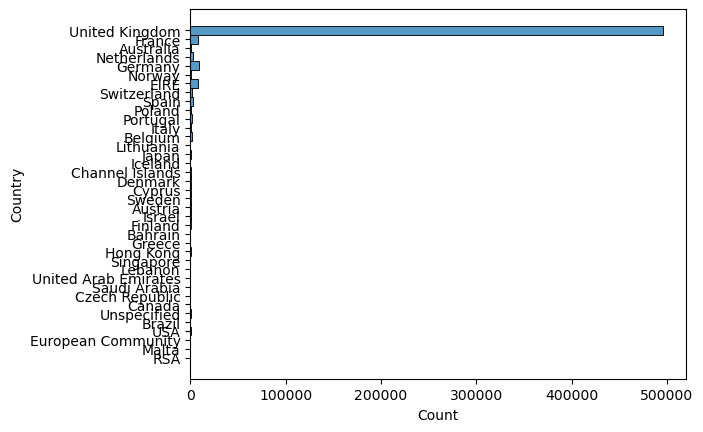

In [24]:
sns.histplot(df, y = 'Country')

The country with more purchases is UK.

In [28]:
data_dates = df.groupby('InvoiceDate')['Quantity'].sum()

/home/levy16/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/levy16/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='InvoiceDate', ylabel='Quantity'>

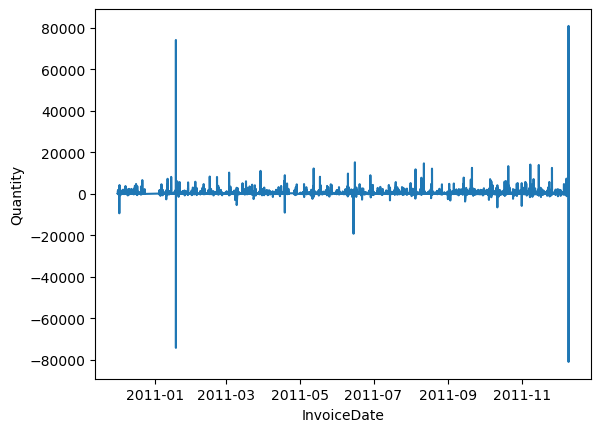

In [30]:
sns.lineplot(data_dates)

The quantity of sales has some outliers that skew the graph.

<Axes: xlabel='UnitPrice'>

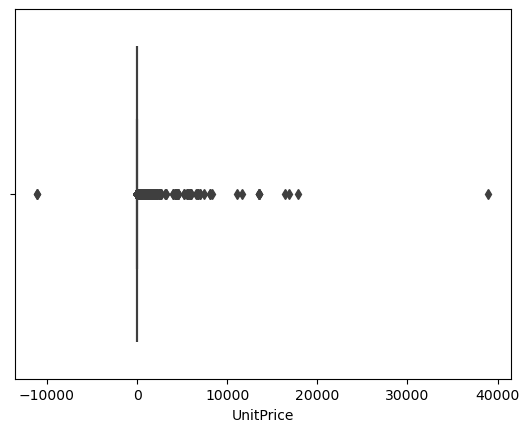

In [33]:
sns.boxplot(df, x = 'UnitPrice')

Also, the number of unit prices varies a lot. That brings as a consequence a lot of outliers.

## Task 5: Analyse the trends over time

As we can see, some values present a lot of outliers. So first, lest ignore them, because almost all of them were in return.

In [38]:
mean_quantity = df['Quantity'].mean()
std_quantity = df['Quantity'].std()
lower_limit = mean_quantity-200
upper_limit = mean_quantity+200

print(lower_limit, upper_limit)

-190.44775045256677 209.55224954743323


In [40]:
df = df[ (lower_limit <df['Quantity']) & (df['Quantity']< upper_limit)]
df.describe()

,Quantity,InvoiceDate,UnitPrice,Sales
count,539844.000000,539844,539844.000000,539844.000000
mean,8.416746,2011-07-04 13:13:34.568430848,4.624108,16.336209
min,-188.000000,2010-12-01 08:26:00,-11062.060000,-38970.000000
25%,1.000000,2011-03-28 10:52:00,1.250000,3.400000
50%,3.000000,2011-07-19 17:17:00,2.080000,9.360000
75%,10.000000,2011-10-19 11:41:00,4.130000,17.400000
max,208.000000,2011-12-09 12:50:00,38970.000000,38970.000000
std,17.193545,NaN,96.944469,117.188632


It is also needed for UnitPrice

In [43]:
mean_quantity = df['UnitPrice'].mean()
std_quantity = df['UnitPrice'].std()
lower_limit = mean_quantity-20
upper_limit = mean_quantity+20

print(lower_limit, upper_limit)

-15.375892435592506 24.624107564407495


In [44]:
df = df[ (lower_limit <df['UnitPrice']) & (df['UnitPrice']< upper_limit)]
df.describe()

,Quantity,InvoiceDate,UnitPrice,Sales
count,536350.000000,536350,536350.000000,536350.000000
mean,8.462590,2011-07-04 16:51:28.909629696,3.165865,16.309739
min,-188.000000,2010-12-01 08:26:00,0.000000,-1642.500000
25%,1.000000,2011-03-28 12:13:00,1.250000,3.380000
50%,3.000000,2011-07-20 11:50:00,2.080000,9.300000
75%,10.000000,2011-10-19 11:52:00,4.130000,17.340000
max,208.000000,2011-12-09 12:50:00,23.530000,2598.750000
std,17.238171,NaN,3.120846,37.085864


Now we can get a better graph for the sales.

/home/levy16/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/levy16/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='InvoiceDate', ylabel='Quantity'>

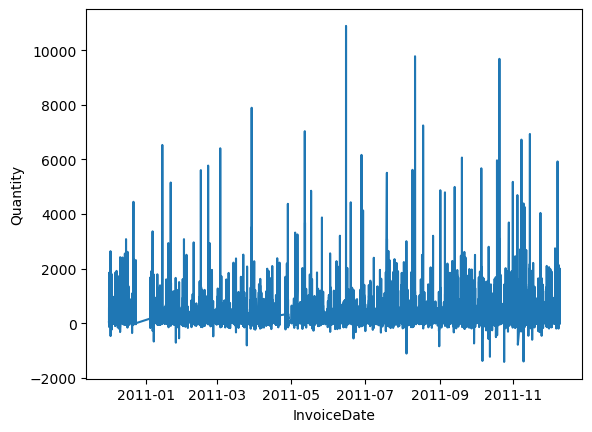

In [48]:
data_dates = df.groupby('InvoiceDate')['Quantity'].sum()
sns.lineplot(data_dates)

In [50]:
df = df.reset_index()
df.head()

,index,Quantity,InvoiceDate,UnitPrice,Country,Sales
0,0,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,1,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
2,2,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00
3,3,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34
4,4,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34


Now we want to know the busiest moth.
So first, we need to ensure to only analyze on one year, let's cut off the period from 2010-12-01 to 2011-11-30.

In [53]:
cutoff_date = pd.to_datetime('2011-12-01 00:00:00')
df = df[df['InvoiceDate']< cutoff_date]
df.tail()

,index,Quantity,InvoiceDate,UnitPrice,Country,Sales
511030,516379,-1,2011-11-30 17:39:00,0.85,United Kingdom,-0.85
511031,516380,-1,2011-11-30 17:39:00,3.29,United Kingdom,-3.29
511032,516381,-1,2011-11-30 17:42:00,1.25,United Kingdom,-1.25
511033,516382,-1,2011-11-30 17:42:00,7.95,United Kingdom,-7.95
511034,516383,-3,2011-11-30 17:42:00,3.75,United Kingdom,-11.25


Now, create two new columns to emphasize the moth and the day of the moth.

In [56]:
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df.head()

,index,Quantity,InvoiceDate,UnitPrice,Country,Sales,Month,Day
0,0,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,12,1
1,1,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,12,1
2,2,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,12,1
3,3,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,12,1
4,4,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,12,1


In [58]:
df.tail()

,index,Quantity,InvoiceDate,UnitPrice,Country,Sales,Month,Day
511030,516379,-1,2011-11-30 17:39:00,0.85,United Kingdom,-0.85,11,30
511031,516380,-1,2011-11-30 17:39:00,3.29,United Kingdom,-3.29,11,30
511032,516381,-1,2011-11-30 17:42:00,1.25,United Kingdom,-1.25,11,30
511033,516382,-1,2011-11-30 17:42:00,7.95,United Kingdom,-7.95,11,30
511034,516383,-3,2011-11-30 17:42:00,3.75,United Kingdom,-11.25,11,30


In [59]:
sales_per_moth = df.groupby('Month')['Sales'].sum()
sales_per_moth

Month
1      512706.430
2      457394.250
3      613758.210
4      449788.161
5      675432.520
6      610648.140
7      612449.131
8      616396.730
9      885176.562
10     954668.410
11    1289210.080
12     675234.230
Name: Sales, dtype: float64

As we can see, the busiest month is November.

/home/levy16/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/levy16/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Month', ylabel='Sales'>

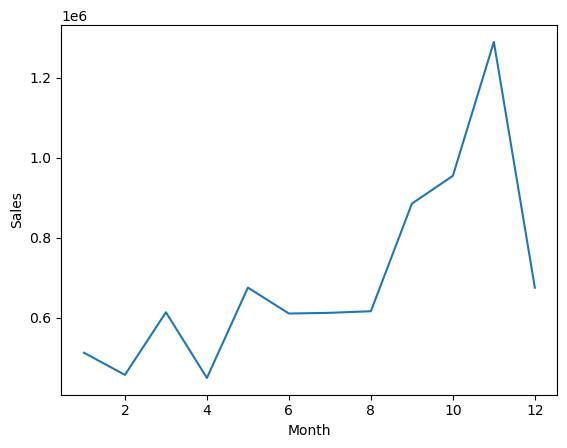

In [62]:
sns.lineplot(sales_per_moth)

In [65]:
sales_per_day = df.groupby('Day')['Sales'].sum()
sales_per_day

Day
1     240484.610
2     215655.450
3     268680.900
4     288125.170
5     280278.780
6     300041.630
7     335679.460
8     288325.350
9     262147.170
10    316811.740
11    319465.320
12    225519.060
13    263817.850
14    367853.770
15    291220.741
16    281563.250
17    343044.710
18    291306.420
19    244796.820
20    308200.870
21    334945.090
22    257448.580
23    261947.530
24    257194.990
25    247622.891
26    175546.762
27    219578.770
28    277495.900
29    212609.710
30    214092.260
31    161361.300
Name: Sales, dtype: float64

And the busiest days of the moth the 15th and 20th

/home/levy16/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/levy16/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Day', ylabel='Sales'>

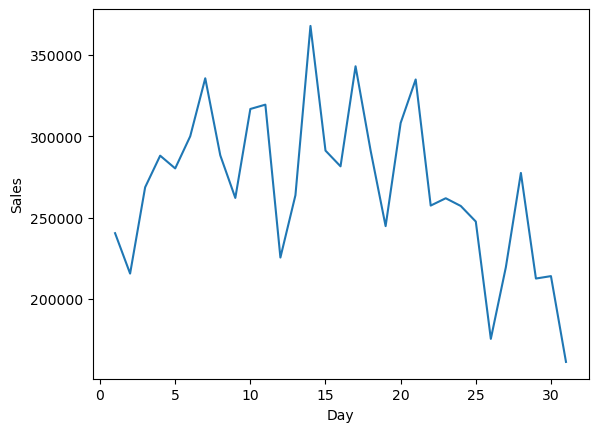

In [68]:
sns.lineplot(sales_per_day)

## Task 6: Explore the top-selling products and countries based on the quantity sold.
Let's load again the dataset, and now drop some columns that are not going to be needed.

In [74]:
df = pd.read_excel("Online Retail.xlsx")

In [76]:
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [79]:
df = df.drop(['InvoiceNo', 'CustomerID'], axis = 1)
df.head(2)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom


The product and the number of sales of it is given by:

In [94]:
df_product = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending = False)
df_product

StockCode
22197      56450
84077      53847
85099B     47363
85123A     38830
84879      36221
           ...  
79323LP    -2618
79323W     -4838
72140F     -5368
23003      -8516
23005     -14418
Name: Quantity, Length: 4070, dtype: int64

So the most common product sold is the one Code '22197'. 
Now, to know number of products by country let's make:

In [92]:
df_country = df.groupby('Country')['Quantity'].sum().sort_values(ascending = False)
df_country

Country
United Kingdom          4263829
Netherlands              200128
EIRE                     142637
Germany                  117448
France                   110480
Australia                 83653
Sweden                    35637
Switzerland               30325
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16180
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Hong Kong                  4769
Israel                     4353
Poland                     3653
Unspecified                3300
Canada                     2763
Iceland                    2458
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652


So the countrie with more purchases by products is UK.

## Task 8:  Conclusions 

- As we can see, the country that buys the most is the UK.
- Some of the outliers in the dataset make a lot of noise. Some orders could cause them to be inconcluded or with a lack of sense from the buyer.
- The company has opportunities to insert in the market of the middle Europe.
- 22197, 84077, 85099B, 85123A, and 84879 are the top retail store sales.     
  

### Other findings

I want to know which countries do more buying besides the UK.

In [81]:
df_outside = df[df['Country']!='United Kingdom']
df_outside.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country
26,536370,22728,24,2010-12-01 08:45:00,3.75,France
27,536370,22727,24,2010-12-01 08:45:00,3.75,France
28,536370,22726,12,2010-12-01 08:45:00,3.75,France
29,536370,21724,12,2010-12-01 08:45:00,0.85,France
30,536370,21883,24,2010-12-01 08:45:00,0.65,France


/home/levy16/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Count', ylabel='Country'>

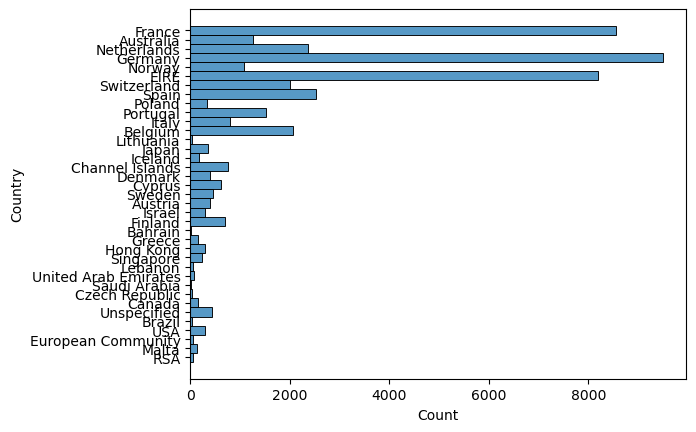

In [84]:
sns.histplot(df_outside, y = 'Country')

I want to emphasize the countries that have potential entry into the market. So I will only examine the 10 countries with more transactions made.

In [133]:
top_10_countries = df_outside['Country'].value_counts().head(10).index.tolist()
top_10_countries

['Germany',
 'France',
 'EIRE',
 'Spain',
 'Netherlands',
 'Belgium',
 'Switzerland',
 'Portugal',
 'Australia',
 'Norway']

In [174]:
df_tops = df_outside[df_outside['Country'].isin(top_10_countries)].reset_index()
df_tops.head()

,index,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country
0,26,536370,22728,24,2010-12-01 08:45:00,3.75,France
1,27,536370,22727,24,2010-12-01 08:45:00,3.75,France
2,28,536370,22726,12,2010-12-01 08:45:00,3.75,France
3,29,536370,21724,12,2010-12-01 08:45:00,0.85,France
4,30,536370,21883,24,2010-12-01 08:45:00,0.65,France


/home/levy16/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Count', ylabel='Country'>

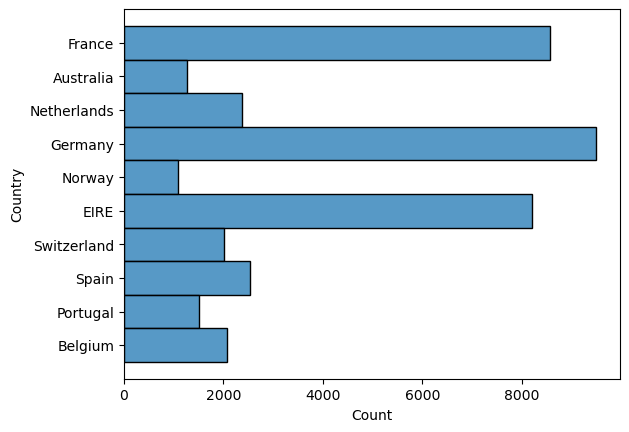

In [172]:
sns.histplot(df_tops, y = 'Country')